**For data source click** <a href="https://archive.ics.uci.edu/ml/datasets/Hepatitis">Here<a/>

<br/> Author **Shereef Bankole**
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/\">Here<a/>
<br/> **Github click**  <a href="https://github.com/SAB-6\">Here<a/>

## Table of contents
- [Project objectives](#Project-objectives)
- [Data exploration](#Exploratory-data-analysis)
- [Data Wrangling](#Data-wrangling)
- [Data modelling](#Modelling)
- [Model Evaluation](#Model-evaluation)

## Import Required libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
%matplotlib inline
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
from sklearn.compose import ColumnTransformer, make_column_transformer

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams.update({'font.size': 18})
import warnings
warnings.filterwarnings('ignore')

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data

--2020-07-19 13:42:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/x-httpd-php]
Saving to: ‘hepatitis.data’

hepatitis.data      100%[===================>]   7.37K  --.-KB/s    in 0s      

2020-07-19 13:42:50 (271 MB/s) - ‘hepatitis.data’ saved [7545/7545]



,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [ ]:
data.columns = 

In [ ]:
#

## Project objectives

Predicting patient mortality due to hepatitis

#Exploratory data analysis

In [10]:
data= pd.read_table('hepatitis.data', sep =',')
data.columns = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM",
                "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
                "PROTIME", "HISTOLOGY"]
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [11]:
# shuffle data
data = data.sample(frac = 1).reset_index(drop =True)

In [13]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,44,1,1,2,1,1,2,1,1,2,1,2,2,3.00,114,65,3.5,?,2
1,2,39,1,2,2,1,2,2,2,2,2,2,2,2,1.00,34,15,4.0,54,1
2,2,49,1,1,1,1,1,1,2,1,2,1,2,2,0.60,85,48,3.7,?,1
3,1,33,1,1,2,1,1,2,2,2,2,2,1,2,0.70,63,80,3.0,31,2
4,2,23,1,2,2,1,1,1,2,2,2,2,2,2,0.80,?,14,4.8,?,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            154 non-null    int64 
 1   age              154 non-null    int64 
 2   sex              154 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       154 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        154 non-null    object
 9   liver_firm       154 non-null    object
 10  spleen_palpable  154 non-null    object
 11  spiders          154 non-null    object
 12  ascites          154 non-null    object
 13  varices          154 non-null    object
 14  bilirubin        154 non-null    object
 15  alk_phosphate    154 non-null    object
 16  sgot             154 non-null    object
 17  albumin          154 non-null    ob

In [14]:
data.isnull().sum().sort_values()

class              0
albumin            0
sgot               0
alk_phosphate      0
bilirubin          0
varices            0
ascites            0
spiders            0
spleen_palpable    0
liver_firm         0
liver_big          0
anorexia           0
malaise            0
fatigue            0
antivirals         0
steroid            0
sex                0
age                0
protime            0
histology          0
dtype: int64

## Both info and isnull methods did notr reveal the missing values within each attributes.  However, <a href ="https://archive.ics.uci.edu/ml/datasets/Hepatitis">the data source indicates presence of missing values within the dataset</a>.

In [17]:
# Replace question mark with np.Nan
data = data.replace('?',np.nan)
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,44,1,1,2,1,1,2,1,1,2,1,2,2,3.00,114,65,3.5,NaN,2
1,2,39,1,2,2,1,2,2,2,2,2,2,2,2,1.00,34,15,4.0,54,1
2,2,49,1,1,1,1,1,1,2,1,2,1,2,2,0.60,85,48,3.7,NaN,1
3,1,33,1,1,2,1,1,2,2,2,2,2,1,2,0.70,63,80,3.0,31,2
4,2,23,1,2,2,1,1,1,2,2,2,2,2,2,0.80,NaN,14,4.8,NaN,1


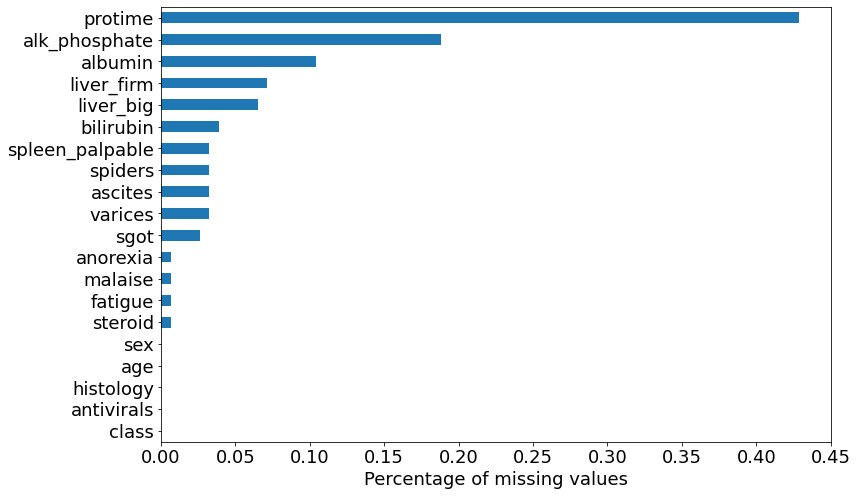

In [24]:
(data.isnull().sum().sort_values()/len(data)).plot(kind = 'barh');
plt.xlabel("Percentage of missing values");

#### From the bar chart above, sex, age, histology, antivirals nad class attributes have no missing value. Missing values for other attributes varies from very few percentage to more than 40%

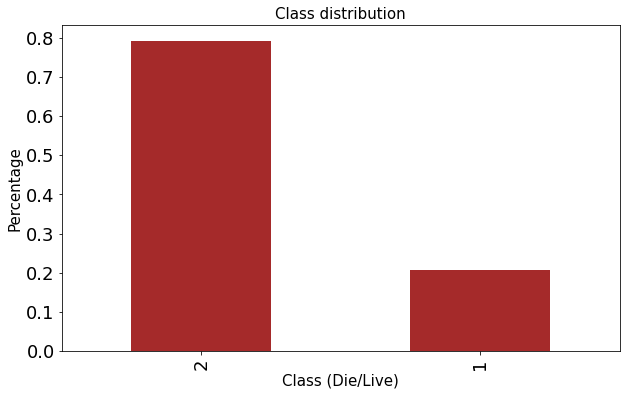

In [23]:
# Check for class imbalance
(data['class'].value_counts()/len(data)).plot(kind='bar', color = 'brown',figsize=(10, 6), stacked=False)
plt.xlabel("Class (Die/Live)", fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title("Class distribution", fontsize=15);

## The sample is skewed as indicated by the class distribution plot above

## Data wrangling


## Data modelling

## Model evaluation